In [1]:
import time
import numpy as np
import pandas as pd
import datetime as dt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [2]:
pd.set_option('display.max_columns', None)
PATH_DATA_RAW= '../Data/Raw/'
PATH_DATA_CLEAN = '../Data/Clean/'

In [3]:
df = pd.read_csv(PATH_DATA_CLEAN+'train_clean2.csv')
df.sample(5)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays,total_guests,kids,guest_location,RateSpecialReq_to_TotalGuest,cancelrate_byMarket,arrival_date,cancel_or_stay_length,park_car_req
76048,0,71,2019,July,31,30,2,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,142.0,0,3,Check-Out,2019-08-03,4,2,0,International,1.5,0.367236,2019-07-30,4,No
6064,1,7,2018,March,11,11,1,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,1,0,Transient,103.0,0,0,Canceled,2018-03-07,6,1,0,International,0.0,0.367236,2018-03-11,4,No
82368,1,28,2019,March,9,2,2,BB,Groups,TA/TO,0,0,0,A,A,0,Non Refund,0,0,Transient,95.0,0,0,Canceled,2019-02-02,3,2,0,Local,0.0,0.607026,2019-03-02,28,No
78727,1,120,2019,June,23,6,2,BB,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,1,0,Transient,115.5,0,0,Canceled,2019-05-29,3,2,0,Local,0.0,0.367236,2019-06-06,8,No
16519,1,46,2019,March,12,25,2,BB,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,1,0,Transient,204.0,0,0,Canceled,2019-02-15,5,4,2,International,0.0,0.367236,2019-03-25,38,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82601 entries, 0 to 82600
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     82601 non-null  int64  
 1   lead_time                       82601 non-null  int64  
 2   arrival_date_year               82601 non-null  int64  
 3   arrival_date_month              82601 non-null  object 
 4   arrival_date_week_number        82601 non-null  int64  
 5   arrival_date_day_of_month       82601 non-null  int64  
 6   adults                          82601 non-null  int64  
 7   meal                            82601 non-null  object 
 8   market_segment                  82601 non-null  object 
 9   distribution_channel            82601 non-null  object 
 10  is_repeated_guest               82601 non-null  int64  
 11  previous_cancellations          82601 non-null  int64  
 12  previous_bookings_not_canceled  

In [5]:
fitur = ['lead_time','adults', 'meal', 'market_segment', 'distribution_channel','is_repeated_guest',
         'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type','assigned_room_type',
         'booking_changes','deposit_type','agent','customer_type','days_in_waiting_list','park_car_req',
         'adr','total_of_special_requests','total_stays','total_guests','kids','guest_location',
         'RateSpecialReq_to_TotalGuest','cancelrate_byMarket']
target = ['is_canceled']

In [6]:
df1 = df[fitur]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82601 entries, 0 to 82600
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       82601 non-null  int64  
 1   adults                          82601 non-null  int64  
 2   meal                            82601 non-null  object 
 3   market_segment                  82601 non-null  object 
 4   distribution_channel            82601 non-null  object 
 5   is_repeated_guest               82601 non-null  int64  
 6   previous_cancellations          82601 non-null  int64  
 7   previous_bookings_not_canceled  82601 non-null  int64  
 8   reserved_room_type              82601 non-null  object 
 9   assigned_room_type              82601 non-null  object 
 10  booking_changes                 82601 non-null  int64  
 11  deposit_type                    82601 non-null  object 
 12  agent                           

# Data Preprocessing

### Encoding Categorical Feature

In [7]:
#Encoding feature
df_encoded = pd.get_dummies(df1, columns=['meal', 'market_segment', 'distribution_channel', 
                                          'reserved_room_type', 'assigned_room_type', 'deposit_type',
                                          'customer_type', 'park_car_req', 'guest_location'],
                                          prefix=['meal', 'market_segment', 'distribution_channel', 
                                          'reserved_room_type', 'assigned_room_type', 'deposit_type',
                                          'customer_type', 'park_car_req', 'guest_location'])
# Menggabungkan DataFrame hasil encoding ke DataFrame asli
df1 = pd.concat([df1, df_encoded], axis=1)
df1.info()
df1.drop(['meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 
           'assigned_room_type', 'deposit_type', 'customer_type', 'park_car_req',
           'guest_location'], axis=1, inplace=True)

# Mendapatkan daftar nama kolom yang duplikat
duplicate_columns = df1.columns[df1.columns.duplicated()]

# Menghapus kolom yang duplikat dari DataFrame
df1 = df1.loc[:, ~df1.columns.duplicated()]

# Menampilkan DataFrame setelah menghapus kolom duplikat
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82601 entries, 0 to 82600
Data columns (total 86 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       82601 non-null  int64  
 1   adults                          82601 non-null  int64  
 2   meal                            82601 non-null  object 
 3   market_segment                  82601 non-null  object 
 4   distribution_channel            82601 non-null  object 
 5   is_repeated_guest               82601 non-null  int64  
 6   previous_cancellations          82601 non-null  int64  
 7   previous_bookings_not_canceled  82601 non-null  int64  
 8   reserved_room_type              82601 non-null  object 
 9   assigned_room_type              82601 non-null  object 
 10  booking_changes                 82601 non-null  int64  
 11  deposit_type                    82601 non-null  object 
 12  agent                           

### Transformation Skew Data

In [8]:
# Transformasi data
from scipy.stats import boxcox
data1 = df1['lead_time']
data2 = df1['adr']
transformed_data1, lambda_value1 = boxcox(data1 + 1)
transformed_data2, lambda_value2 = boxcox(data2 + 1)
df1['lead_time'] = transformed_data1
df1['adr'] = transformed_data2

### Feature Scalling

In [9]:
from sklearn.preprocessing import RobustScaler

numeric_features = ['lead_time', 'adults', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'total_of_special_requests', 'total_stays', 'total_guests', 'kids']

scaler = RobustScaler()
df1[numeric_features] = scaler.fit_transform(df1[numeric_features])

In [10]:
from sklearn.model_selection import train_test_split
X = df1
y = df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Karena distribusi target tidak seimbang akan dicoba diperiksa untuk diseimbangkan dengan SMOTE, undersampling, dan oversampling. Apakah jika diresampling model akan lebih bagus atau tidak.

In [11]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

def sampler_compare(samplers, X_train, y_train, X_test, y_test):
    accus, accu_balanceds = [], []

    for sampler in samplers.values():
        X_train_balanced, y_train_balanced = sampler.fit_resample(X_train, y_train)
        
        # Test by logistic regression accuracy
        logit = LogisticRegression(solver='liblinear')
        clf = logit.fit(X_train, y_train)
        accu = roc_auc_score(y_test, clf.predict(X_test))
        clf_balanced = logit.fit(X_train_balanced, y_train_balanced)
        accu_balanced = roc_auc_score(y_test, clf.predict(X_test))

        accus.append(accu)
        accu_balanceds.append(accu_balanced)

    return accus, accu_balanceds


samplers = {'Undersample': RandomUnderSampler(random_state=0),
           'Oversample': RandomOverSampler(random_state=0),
           'SMOTE': SMOTE(random_state=0)}

accus, accu_balanceds = np.round(sampler_compare(samplers, X_train, y_train, X_test, y_test), 4)

In [13]:
# Output comparsion table
table = pd.DataFrame({"Balancing Method": samplers.keys(), 
                      "Accuracy (imbalanced)": accus, 
                      "Accuracy (balanced)": accu_balanceds})

pd.pivot_table(table, index=['Balancing Method']).sort_values(by="Accuracy (balanced)", ascending=False)

,Accuracy (balanced),Accuracy (imbalanced)
Balancing Method,,
Undersample,0.8039,0.7857
SMOTE,0.8031,0.7857
Oversample,0.8029,0.7857


Nilai akurasi model akan lebih jika target diresampling. Dari akurasi terlihat resampling terbaik adalah Undersample

In [14]:
X_train_balanced, y_train_balanced = RandomUnderSampler().fit_resample(X_train, y_train)
print(X_train_balanced.shape)
print(y_train_balanced.shape)

(48994, 62)
(48994,)


# Modeling

Model yang akan digunakan adalah Logistic Regression, Decision Tree, Random Forest dan XGBoost

In [15]:
import time
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, roc_auc_score, classification_report

def calcu_eval_all(models, X_train, X_test, y_train, y_test):
    f1_scores, auc_scores, times, fprs, tprs, get_model, fnr = [], [], [], [], [], [], []

    for name, model in models.items():
        fpr, tpr = [], []
        f1 = auc = exectime = 0

        start = time.process_time()
        if name == "XGBoost" or name == "XGBoost Tuned":
            X_train_np = X_train.to_numpy()
            y_train_np = y_train.to_numpy()
            clf = model.fit(X_train_np, y_train_np)
            y_prob = clf.predict_proba(X_test)[:, 1]
            y_pred = clf.predict(X_test)
        else:
            clf = model.fit(X_train, y_train)
            y_prob = clf.predict_proba(X_test)[:, 1]
            y_pred = clf.predict(X_test) 
        exectime = round(time.process_time() - start, 4)

        # Evaluate Metrics
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        cm = confusion_matrix(y_test, y_pred)
        f1 = round(f1_score(y_test, y_pred), 4)
        auc = round(roc_auc_score(y_test, y_prob), 4)
        report = classification_report(y_test, y_pred)
        false_negative_rate = cm[1, 0] / (cm[1, 0] + cm[1, 1])

        # Print Evaluation Metrics
        print("===================================================================================\n")
        print(f"Nama: {name}\nFalse negative rate: {false_negative_rate}\nAUC Score: {auc}\nF1-Score: {f1}\nConfusion Matrix:\n{cm}\nReport:\n{report}")
        print("===================================================================================\n")

        f1_scores.append(f1)
        auc_scores.append(auc)
        times.append(exectime)
        fprs.append(fpr)
        tprs.append(tpr)
        get_model.append(clf)
        fnr.append(false_negative_rate)

    return f1_scores, auc_scores, times, fprs, tprs, get_model, fnr

In [16]:
def plot_ROC(fprs, tprs, aucs, names):
    plt.figure(0).clf()

    for fpr, tpr, name, auc in zip(fprs, tprs, names, aucs):
        plt.plot(fpr, tpr, label=name+" (AUC="+str(auc)+")")

    ## Plot ROC comparison
    plt.legend(loc=0)
    plt.title("Comparison of Models by ROC")
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")

## Baseline model without any hyperparameter

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## Dictionary: {model name -- classifier}
models = {
    "Logistic Regression": LogisticRegression(),
    "Decisioion Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()}

Without Resampling data

In [18]:
f1_scores, auc_scores, times, fprs, tprs, get_model, fnr = calcu_eval_all(models, X_train, X_test, y_train, y_test)

c:\Users\ramad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Nama: Logistic Regression
False negative rate: 0.34056434513129996
AUC Score: 0.8941
F1-Score: 0.7262
Confusion Matrix:
[[9430  960]
 [2088 4043]]
Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86     10390
           1       0.81      0.66      0.73      6131

    accuracy                           0.82     16521
   macro avg       0.81      0.78      0.79     16521
weighted avg       0.81      0.82      0.81     16521



Nama: Decisioion Tree
False negative rate: 0.21888762029032785
AUC Score: 0.8236
F1-Score: 0.7757
Confusion Matrix:
[[8963 1427]
 [1342 4789]]
Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87     10390
           1       0.77      0.78      0.78      6131

    accuracy                           0.83     16521
   macro avg       0.82      0.82      0.82     16521
weighted avg       0.83      0.83      0.83     16521



Nama: Random Forest
False negative 

With resampling data

In [19]:
f1_scores_b, auc_scores_b, times_b, fprs_b, tprs_b, get_model_b, fnr_b= calcu_eval_all(models, X_train_balanced_u, X_test, y_train_balanced_u, y_test)

NameError: name 'X_train_balanced_u' is not defined

In [ ]:
## Output comparsion table
table = pd.DataFrame({"Model": models.keys(), 
                      "F1-Score": f1_scores, 
                      "AUC": auc_scores,
                      "Runtime(s)": times,
                      "F1-Score_B": f1_scores_b, 
                      "AUC_B": auc_scores_b,
                      "Runtime_B(s)": times_b})

pd.pivot_table(table, index=['Model'])\
    .sort_values(by="F1-Score", ascending=False)

,AUC,AUC_B,F1-Score,F1-Score_B,Runtime(s),Runtime_B(s)
Model,,,,,,
Random Forest,0.9381,0.9362,0.8143,0.8092,7.7656,5.7344
XGBoost,0.9364,0.9347,0.8071,0.8044,23.3281,18.0938
Decisioion Tree,0.8235,0.8207,0.7754,0.7707,0.3906,0.3281
Logistic Regression,0.8941,0.8946,0.7262,0.7496,1.1094,0.8750


## Tuning Models

### Decision Tree Tuning

In [72]:
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': randint(1, 20),  # Misalnya, jangkauan dari 1 hingga 20
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None]
}

dt_model = DecisionTreeClassifier()
random_search = RandomizedSearchCV(dt_model, param_distributions=param_dist,
                                   n_iter=50, scoring='accuracy', cv=5, 
                                   verbose=5, n_jobs=-1, return_train_score=True)

random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 19, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 16, 'splitter': 'best'}


### Random Forest Tuning

In [100]:
rf_para = dict(
    n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], #
    bootstrap = [True], 
    criterion = ['gini','entropy'],
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)], 
    min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)],
    min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], 
    max_features = [None, 'sqrt', 'log2'], 
    n_jobs = [-1],
)

rf = RandomForestClassifier()
rf_cv = RandomizedSearchCV(rf, param_distributions=rf_para, n_iter=25,
                           scoring='accuracy', cv=5, verbose=4, n_jobs=-1,
                           return_train_score=True)

rf_cv.fit(X_train, y_train)
print("Best parameters (RF): {}".format(rf_cv.best_params_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters (RF): {'n_jobs': -1, 'n_estimators': 1300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'entropy', 'bootstrap': True}


### XGBoost Tuning

In [38]:
hyperparameters = {
    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
    'tree_method' : ['auto', 'exact', 'approx', 'hist'],
    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],
    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
}

xg = XGBClassifier()
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, n_iter=25, scoring='accuracy',
                              verbose=3, return_train_score=True)
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
xg_tuned.fit(X_train_np,y_train_np)
print("Best paramters (XGBoost): {}".format(xg_tuned.best_params_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END alpha=0.0, colsample_bytree=0.6000000000000001, eta=0.43434343434343436, gamma=0.5, lambda=0.8, max_depth=20, min_child_weight=20, tree_method=exact;, score=(train=0.919, test=0.854) total time=   3.7s
[CV 2/5] END alpha=0.0, colsample_bytree=0.6000000000000001, eta=0.43434343434343436, gamma=0.5, lambda=0.8, max_depth=20, min_child_weight=20, tree_method=exact;, score=(train=0.918, test=0.862) total time=   3.7s
[CV 3/5] END alpha=0.0, colsample_bytree=0.6000000000000001, eta=0.43434343434343436, gamma=0.5, lambda=0.8, max_depth=20, min_child_weight=20, tree_method=exact;, score=(train=0.916, test=0.857) total time=   3.6s
[CV 4/5] END alpha=0.0, colsample_bytree=0.6000000000000001, eta=0.43434343434343436, gamma=0.5, lambda=0.8, max_depth=20, min_child_weight=20, tree_method=exact;, score=(train=0.919, test=0.862) total time=   3.6s
[CV 5/5] END alpha=0.0, colsample_bytree=0.6000000000000001, eta=0.43434343434

Call model with hyperparameter and without hyperparameter to camparing model

In [22]:
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "Decisioion Tree": DecisionTreeClassifier(),
    "Decisioion Tree Tuned": DecisionTreeClassifier(criterion='gini',
                                                    max_depth=15,
                                                    max_features=None,
                                                    min_samples_leaf=8,
                                                    min_samples_split=8,
                                                    splitter='random'),
    "Random Forest": RandomForestClassifier(),
    "Random Forest Tuned": RandomForestClassifier(n_jobs=-1,
                                                  criterion='entropy',
                                                  max_depth=30,
                                                  max_features='sqrt',
                                                  min_samples_leaf=1,
                                                  min_samples_split= 2,
                                                  bootstrap=True,
                                                  n_estimators=1300),
    "XGBoost": XGBClassifier(),
    "XGBoost Tuned": XGBClassifier(tree_method='auto',
                                   min_child_weight=1,
                                   max_depth=60,
                                   reg_lambda=1.0,
                                   gamma=1.0,
                                   eta=0.20202020202020204,
                                   colsample_bytree=0.30000000000000004,
                                   alpha=0.7000000000000001)}

In [23]:
f1_scores, auc_scores, times, fprs, tprs, get_model, fnr = calcu_eval_all(models, X_train, X_test, y_train, y_test)


Nama: Logistic Regression
False negative rate: 0.3368129179579188
AUC Score: 0.8955
F1-Score: 0.7293
Confusion Matrix:
[[9437  953]
 [2065 4066]]
Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86     10390
           1       0.81      0.66      0.73      6131

    accuracy                           0.82     16521
   macro avg       0.82      0.79      0.80     16521
weighted avg       0.82      0.82      0.81     16521



Nama: Decisioion Tree
False negative rate: 0.22084488664165716
AUC Score: 0.8244
F1-Score: 0.7766
Confusion Matrix:
[[8996 1394]
 [1354 4777]]
Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     10390
           1       0.77      0.78      0.78      6131

    accuracy                           0.83     16521
   macro avg       0.82      0.82      0.82     16521
weighted avg       0.83      0.83      0.83     16521



Nama: Decisioion Tree Tuned
False ne

In [24]:
f1_scores_b, auc_scores_b, times_b, fprs_b, tprs_b, get_model_b, fnr_b= calcu_eval_all(models, X_train_balanced, X_test, y_train_balanced, y_test)


Nama: Logistic Regression
False negative rate: 0.2164410373511662
AUC Score: 0.8956
F1-Score: 0.7517
Confusion Matrix:
[[8544 1846]
 [1327 4804]]
Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84     10390
           1       0.72      0.78      0.75      6131

    accuracy                           0.81     16521
   macro avg       0.79      0.80      0.80     16521
weighted avg       0.81      0.81      0.81     16521



Nama: Decisioion Tree
False negative rate: 0.17745881585385745
AUC Score: 0.8191
F1-Score: 0.7679
Confusion Matrix:
[[8430 1960]
 [1088 5043]]
Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85     10390
           1       0.72      0.82      0.77      6131

    accuracy                           0.82     16521
   macro avg       0.80      0.82      0.81     16521
weighted avg       0.82      0.82      0.82     16521



Nama: Decisioion Tree Tuned
False ne

In [25]:
## Output comparsion table
table = pd.DataFrame({"Model": models.keys(), 
                      "F1-Score": f1_scores, 
                      "False negative rate": fnr,
                      "Runtime(s)": times,
                      "F1-Score_B": f1_scores_b, 
                      "False negative rate_B": fnr_b,
                      "Runtime_B(s)": times_b})

pd.pivot_table(table, index=['Model']).sort_values(by="F1-Score", ascending=False)

,F1-Score,F1-Score_B,False negative rate,False negative rate_B,Runtime(s),Runtime_B(s)
Model,,,,,,
Random Forest Tuned,0.8169,0.8141,0.212527,0.153319,162.2344,91.0625
XGBoost Tuned,0.8135,0.8137,0.217583,0.144675,55.4219,37.8594
Random Forest,0.8130,0.8109,0.215789,0.154624,7.8750,5.6406
XGBoost,0.8071,0.8039,0.223291,0.159843,19.8906,16.2969
Decisioion Tree Tuned,0.7779,0.7748,0.243843,0.185451,0.2656,0.1250
Decisioion Tree,0.7766,0.7679,0.220845,0.177459,0.4375,0.3281
Logistic Regression,0.7293,0.7517,0.336813,0.216441,0.7500,0.5625


Berdasarkan F1-Score dan False Negative Rate, XGBoost Tuned pada resampling dipilih sebagai model terbaik karena memiliki F1-Score yang tinggi dan nilai False Negative Rate yang lebih rendah, menunjukkan kinerja yang baik dalam meminimalkan kesalahan prediksi negatif pada dataset yang digunakan.

## Feature Important

### XGBoost

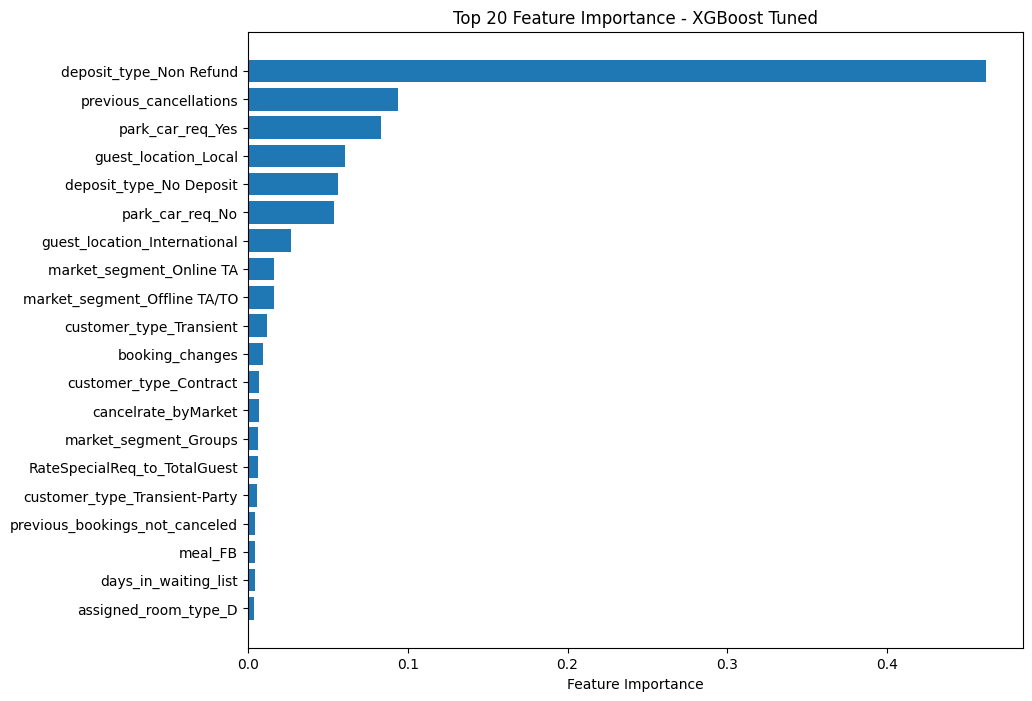

In [26]:
xgb_tuned_model = get_model_b[-1]
feature_importance = xgb_tuned_model.feature_importances_
feature_names = X.columns  
sorted_idx = np.argsort(feature_importance)
top_features = sorted_idx[-20:]

plt.figure(figsize=(10, 8))
plt.barh(range(len(top_features)), feature_importance[top_features], align="center")
plt.yticks(range(len(top_features)), feature_names[top_features])
plt.xlabel("Feature Importance")
plt.title("Top 20 Feature Importance - XGBoost Tuned")
plt.show()

Top 5 Feature Importance:
1. deposit_type_Non Refund
2. Previous Cancellations
3. park_car_req_Yes
4. guest_location_Local
5. deposit_type_No Deposit

### Random Forest

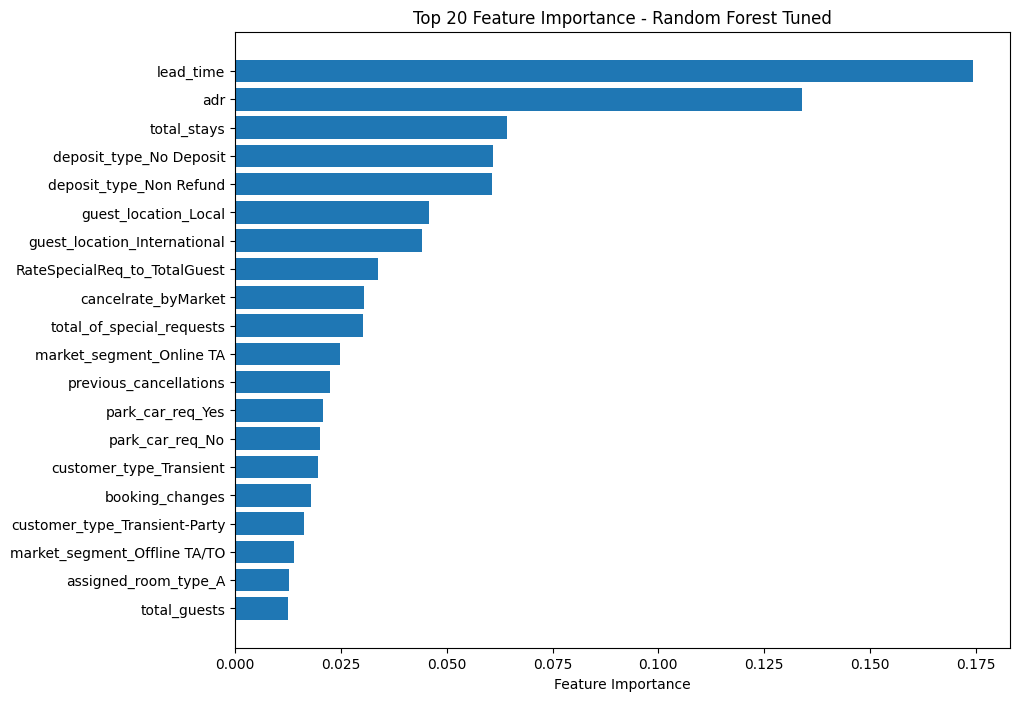

In [29]:
rf_tuned_model = get_model_b[4]
feature_importance = rf_tuned_model.feature_importances_
feature_names = X.columns  
sorted_idx = np.argsort(feature_importance)
top_features = sorted_idx[-20:]

plt.figure(figsize=(10, 8))
plt.barh(range(len(top_features)), feature_importance[top_features], align="center")
plt.yticks(range(len(top_features)), feature_names[top_features])
plt.xlabel("Feature Importance")
plt.title("Top 20 Feature Importance - Random Forest Tuned")
plt.show()

Top 5 Feature Importance:
1. Lead Time
2. adr
3. Total_Stays
4. deposit_type_No Deposit
5. deposit_type_Non Refund

## Kesimpulan dari model

Based on the comparison of the XGBoost and Random Forest models and the interpretation of feature importance, the following conclusions can be drawn:

1. Model Performance:
The XGBoost and Random Forest models show good performance in predicting hotel cancelations.
Random Forest has a slightly higher F1-Score, while XGBoost has a lower False Negative Rate.
2. Important Factors:
Both models identified features consistent with EDA findings, such as Lead Time, deposit type, cancellation history, and guest location, as important factors in cancellation decisions.
3. XGBoost:
The XGBoost model emphasizes the importance of deposit type, previous cancellation history, parking demand, and guest location in making predictions.
deposit_type_Non Refund became the most important feature, highlighting the impact of non-refundable policies on cancellation decisions.
4. Random Forest:
The Random Forest model highlights the role of time between booking and arrival (Lead Time), average daily rate (adr), total number of stays, and deposit type in cancellation.
Lead Time was the most important feature, showing the importance of time as a predictive factor.
5. General Conclusions:
Both models provide similar insights into the factors that influence cancellations, however considering specific objectives and business preferences may influence model selection.
Hotel booking cancellation decisions are influenced by a combination of timing, deposit type, cancellation history, and customer locational factors.